# Weather Analysis

Martín Singla - Data Analyst 

### 0.0 - Project Description (Part 1)
As per known by common sense and scientific evidence, the closer we get to Earth´s Equator, the hotter average temperatures get due to proximity to the Sun. In this project we will try to prove that fact through data and statistical evidence. 

We will generate a random sample of cities across the globe with their geographic coordinates by utilizing CitiPy library, and we will get the current meteorological data for each of those cities through OpenWeatherMap API calls. Subsequently, we will run a regression analysis to check the statistical relationship between those meteorological variables and proximity to the Equator. In this case, only Linear Regression analysis is provided. Other potential non-linear alternatives are suggested.


### 0.1 - Libraries & API keys

In [24]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress

#API keys
from api_keys import weather_key

### 1.1 - Identification of Cities

In [25]:
#Generating list of cities to analyze

#Citipy library finds city name nearest to a specified geo-coord
#Usage explained by authors in: https://github.com/wingchen/citipy
from citipy import citipy 

#Getting geo-coords sample
np.random.seed(99) #setting seed to get same results as running the script multiple times

#Minimum and Maxium Latitud in the World: -90º to 90º
lat_samp = np.random.uniform(low= -90, high= 90, size= 10000)
#Minimum and Maxium Longitude in the World: -180º to 180
lng_samp = np.random.uniform(low= -180, high= 180, size= 10000)

#Searching for city names
city_names = []
country_codes = []
for i in range(0, 10000):
    a = citipy.nearest_city(lat_samp[i], lng_samp[i])
    city_names.append(a.city_name)
    country_codes.append(a.country_code)
len(city_names) #10000 city names matched

#removing duplicated cities
unique_cities = []
estimated_lat = []
estimated_lng = []
country= []

for i in range(0, 10000):
    if city_names[i] not in unique_cities:
        unique_cities.append(city_names[i])
        estimated_lat.append(lat_samp[i])
        estimated_lng.append(lng_samp[i])
        country.append(country_codes[i])

#creating dataframe
df = pd.DataFrame({
    "City" : unique_cities, "Country_code" : unique_country,
    "Lat" : unique_lat, "Lng" : unique_lng
})        

print(f'{len(df)} unique cities identified')  #2286 unique cities

2286 unique cities identified


### 1.2 - Meteorological Data Gathering

In [26]:
#Gathering Meteorological data through OpenWeather API
#Documentation available in: https://openweathermap.org/current
#The task requires us to get values in Imperial System 

df["Temperature (F)"] = ''
df["Humidity (%)"] = ''
df["Cloudiness (%)"] = ''
df["Wind Speed (mph)"] = ''
df["Preassure"] = ''
df["Sea Level (ft)"] = ''

#Looping over df to find city temperatures
for i in range(0, len(df)):
    
    #querying
    print(f'ID {i}: Querying city: {df.iloc[i,0]}') 
    url = f'http://api.openweathermap.org/data/2.5/weather?q={df.iloc[i,0]}&appid={weather_key}&units=imperial'
    response = requests.get(url)
    response = response.json()
    
    try:
        #Assingning to df
        df.iloc[i, 2] = response["coord"]["lat"]
        df.iloc[i, 3] = response["coord"]["lon"]
        df.iloc[i, 4] = response["main"]["temp"] 
        df.iloc[i, 5] = response["main"]["humidity"] 
        df.iloc[i, 6] = response["clouds"]["all"] 
        df.iloc[i, 7] = response["wind"]["speed"] 
        df.iloc[i, 8] = response["main"]["pressure"] 
        df.iloc[i, 9] = response["main"]["sea_level"] 
    
    except:
        print(f'(!!) Some information not found for city {df.iloc[i,0]}')
        pass
    
    print("-----------------------------------------------")

#Cleaning df
df = df.replace("", float("NaN"))
df = df.dropna(subset= ["Temperature (F)"])

#Saving raw df
df.to_csv("results/global_city_weather_df.csv", index= False)

df.head()

ID 0: Querying city: los llanos de aridane
(!!) Some information not found for city los llanos de aridane
-----------------------------------------------
ID 1: Querying city: rungata
(!!) Some information not found for city rungata
-----------------------------------------------
ID 2: Querying city: paamiut
-----------------------------------------------
ID 3: Querying city: mataura
(!!) Some information not found for city mataura
-----------------------------------------------
ID 4: Querying city: arman
-----------------------------------------------
ID 5: Querying city: hilo
(!!) Some information not found for city hilo
-----------------------------------------------
ID 6: Querying city: rikitea
-----------------------------------------------
ID 7: Querying city: hobart
(!!) Some information not found for city hobart
-----------------------------------------------
ID 8: Querying city: dikson
-----------------------------------------------
ID 9: Querying city: albany
(!!) Some informa

-----------------------------------------------
ID 76: Querying city: hasaki
(!!) Some information not found for city hasaki
-----------------------------------------------
ID 77: Querying city: dingle
-----------------------------------------------
ID 78: Querying city: anloga
(!!) Some information not found for city anloga
-----------------------------------------------
ID 79: Querying city: leningradskiy
-----------------------------------------------
ID 80: Querying city: kirakira
-----------------------------------------------
ID 81: Querying city: saint-philippe
(!!) Some information not found for city saint-philippe
-----------------------------------------------
ID 82: Querying city: atuona
-----------------------------------------------
ID 83: Querying city: meadow lake
(!!) Some information not found for city meadow lake
-----------------------------------------------
ID 84: Querying city: pangkalanbuun
-----------------------------------------------
ID 85: Querying city: dub

-----------------------------------------------
ID 150: Querying city: labuhan
-----------------------------------------------
ID 151: Querying city: grand river south east
(!!) Some information not found for city grand river south east
-----------------------------------------------
ID 152: Querying city: yarada
(!!) Some information not found for city yarada
-----------------------------------------------
ID 153: Querying city: kandrian
-----------------------------------------------
ID 154: Querying city: emerald
(!!) Some information not found for city emerald
-----------------------------------------------
ID 155: Querying city: baykit
-----------------------------------------------
ID 156: Querying city: luwuk
-----------------------------------------------
ID 157: Querying city: clyde river
(!!) Some information not found for city clyde river
-----------------------------------------------
ID 158: Querying city: sinegorye
-----------------------------------------------
ID 159: Q

(!!) Some information not found for city fort morgan
-----------------------------------------------
ID 226: Querying city: yicheng
-----------------------------------------------
ID 227: Querying city: pecos
(!!) Some information not found for city pecos
-----------------------------------------------
ID 228: Querying city: pelym
-----------------------------------------------
ID 229: Querying city: bendigo
(!!) Some information not found for city bendigo
-----------------------------------------------
ID 230: Querying city: chom bung
(!!) Some information not found for city chom bung
-----------------------------------------------
ID 231: Querying city: les cayes
-----------------------------------------------
ID 232: Querying city: derzhavinsk
-----------------------------------------------
ID 233: Querying city: babstovo
-----------------------------------------------
ID 234: Querying city: guanaja
-----------------------------------------------
ID 235: Querying city: norwich
(!!) 

(!!) Some information not found for city lufilufi
-----------------------------------------------
ID 304: Querying city: verkhnetulomskiy
(!!) Some information not found for city verkhnetulomskiy
-----------------------------------------------
ID 305: Querying city: sandhaven
(!!) Some information not found for city sandhaven
-----------------------------------------------
ID 306: Querying city: miandrivazo
-----------------------------------------------
ID 307: Querying city: sao domingos
-----------------------------------------------
ID 308: Querying city: mbini
(!!) Some information not found for city mbini
-----------------------------------------------
ID 309: Querying city: nikolskoye
(!!) Some information not found for city nikolskoye
-----------------------------------------------
ID 310: Querying city: zhigansk
-----------------------------------------------
ID 311: Querying city: sao filipe
-----------------------------------------------
ID 312: Querying city: celestun
-----

-----------------------------------------------
ID 382: Querying city: anaco
-----------------------------------------------
ID 383: Querying city: pangnirtung
(!!) Some information not found for city pangnirtung
-----------------------------------------------
ID 384: Querying city: praia da vitoria
(!!) Some information not found for city praia da vitoria
-----------------------------------------------
ID 385: Querying city: kargopol
-----------------------------------------------
ID 386: Querying city: lagos
(!!) Some information not found for city lagos
-----------------------------------------------
ID 387: Querying city: auch
(!!) Some information not found for city auch
-----------------------------------------------
ID 388: Querying city: aksarka
-----------------------------------------------
ID 389: Querying city: tura
-----------------------------------------------
ID 390: Querying city: ciudad bolivar
-----------------------------------------------
ID 391: Querying city: car

(!!) Some information not found for city asau
-----------------------------------------------
ID 462: Querying city: xiuyan
-----------------------------------------------
ID 463: Querying city: nemuro
-----------------------------------------------
ID 464: Querying city: toulepleu
(!!) Some information not found for city toulepleu
-----------------------------------------------
ID 465: Querying city: bose
(!!) Some information not found for city bose
-----------------------------------------------
ID 466: Querying city: lira
-----------------------------------------------
ID 467: Querying city: anuradhapura
-----------------------------------------------
ID 468: Querying city: wulanhaote
(!!) Some information not found for city wulanhaote
-----------------------------------------------
ID 469: Querying city: hami
-----------------------------------------------
ID 470: Querying city: lannion
(!!) Some information not found for city lannion
----------------------------------------------

(!!) Some information not found for city bangui
-----------------------------------------------
ID 538: Querying city: gat
(!!) Some information not found for city gat
-----------------------------------------------
ID 539: Querying city: bedele
-----------------------------------------------
ID 540: Querying city: umm lajj
-----------------------------------------------
ID 541: Querying city: bhasawar
-----------------------------------------------
ID 542: Querying city: blagoyevo
-----------------------------------------------
ID 543: Querying city: slonim
-----------------------------------------------
ID 544: Querying city: chulym
-----------------------------------------------
ID 545: Querying city: daru
-----------------------------------------------
ID 546: Querying city: zelenoborskiy
(!!) Some information not found for city zelenoborskiy
-----------------------------------------------
ID 547: Querying city: ambulu
-----------------------------------------------
ID 548: Queryin

-----------------------------------------------
ID 615: Querying city: manali
(!!) Some information not found for city manali
-----------------------------------------------
ID 616: Querying city: jeannette
(!!) Some information not found for city jeannette
-----------------------------------------------
ID 617: Querying city: emmett
(!!) Some information not found for city emmett
-----------------------------------------------
ID 618: Querying city: bocas del toro
(!!) Some information not found for city bocas del toro
-----------------------------------------------
ID 619: Querying city: shiyan
-----------------------------------------------
ID 620: Querying city: ambanja
-----------------------------------------------
ID 621: Querying city: zemio
-----------------------------------------------
ID 622: Querying city: ahumada
(!!) Some information not found for city ahumada
-----------------------------------------------
ID 623: Querying city: saint-francois
(!!) Some information not 

(!!) Some information not found for city bonavista
-----------------------------------------------
ID 689: Querying city: dole
(!!) Some information not found for city dole
-----------------------------------------------
ID 690: Querying city: aneho
(!!) Some information not found for city aneho
-----------------------------------------------
ID 691: Querying city: beloha
-----------------------------------------------
ID 692: Querying city: ereymentau
-----------------------------------------------
ID 693: Querying city: cristalina
-----------------------------------------------
ID 694: Querying city: palabuhanratu
(!!) Some information not found for city palabuhanratu
-----------------------------------------------
ID 695: Querying city: boa vista
(!!) Some information not found for city boa vista
-----------------------------------------------
ID 696: Querying city: kapitanivka
-----------------------------------------------
ID 697: Querying city: puyo
(!!) Some information not foun

-----------------------------------------------
ID 768: Querying city: yumen
-----------------------------------------------
ID 769: Querying city: brae
(!!) Some information not found for city brae
-----------------------------------------------
ID 770: Querying city: mount gambier
(!!) Some information not found for city mount gambier
-----------------------------------------------
ID 771: Querying city: nakamura
-----------------------------------------------
ID 772: Querying city: asyut
(!!) Some information not found for city asyut
-----------------------------------------------
ID 773: Querying city: louisbourg
(!!) Some information not found for city louisbourg
-----------------------------------------------
ID 774: Querying city: buala
-----------------------------------------------
ID 775: Querying city: college
(!!) Some information not found for city college
-----------------------------------------------
ID 776: Querying city: vostok
----------------------------------------

(!!) Some information not found for city tebingtinggi
-----------------------------------------------
ID 847: Querying city: strezhevoy
(!!) Some information not found for city strezhevoy
-----------------------------------------------
ID 848: Querying city: talah
(!!) Some information not found for city talah
-----------------------------------------------
ID 849: Querying city: mareeba
(!!) Some information not found for city mareeba
-----------------------------------------------
ID 850: Querying city: marienburg
(!!) Some information not found for city marienburg
-----------------------------------------------
ID 851: Querying city: zachagansk
(!!) Some information not found for city zachagansk
-----------------------------------------------
ID 852: Querying city: merauke
-----------------------------------------------
ID 853: Querying city: collierville
(!!) Some information not found for city collierville
-----------------------------------------------
ID 854: Querying city: zeya

(!!) Some information not found for city olinda
-----------------------------------------------
ID 923: Querying city: haljala
-----------------------------------------------
ID 924: Querying city: makakilo city
(!!) Some information not found for city makakilo city
-----------------------------------------------
ID 925: Querying city: bahir dar
-----------------------------------------------
ID 926: Querying city: monte alegre de minas
(!!) Some information not found for city monte alegre de minas
-----------------------------------------------
ID 927: Querying city: beatrice
(!!) Some information not found for city beatrice
-----------------------------------------------
ID 928: Querying city: jaumave
(!!) Some information not found for city jaumave
-----------------------------------------------
ID 929: Querying city: labutta
(!!) Some information not found for city labutta
-----------------------------------------------
ID 930: Querying city: darhan
--------------------------------

(!!) Some information not found for city beeville
-----------------------------------------------
ID 998: Querying city: gbarnga
-----------------------------------------------
ID 999: Querying city: yatou
-----------------------------------------------
ID 1000: Querying city: jingdezhen
-----------------------------------------------
ID 1001: Querying city: kaisiadorys
(!!) Some information not found for city kaisiadorys
-----------------------------------------------
ID 1002: Querying city: saint-michel-des-saints
-----------------------------------------------
ID 1003: Querying city: aljezur
-----------------------------------------------
ID 1004: Querying city: matsanga
(!!) Some information not found for city matsanga
-----------------------------------------------
ID 1005: Querying city: chara
-----------------------------------------------
ID 1006: Querying city: konstantinovka
-----------------------------------------------
ID 1007: Querying city: yambio
-----------------------

(!!) Some information not found for city banepa
-----------------------------------------------
ID 1078: Querying city: yanaul
-----------------------------------------------
ID 1079: Querying city: aiken
(!!) Some information not found for city aiken
-----------------------------------------------
ID 1080: Querying city: tuggurt
(!!) Some information not found for city tuggurt
-----------------------------------------------
ID 1081: Querying city: hailar
-----------------------------------------------
ID 1082: Querying city: puerto leguizamo
-----------------------------------------------
ID 1083: Querying city: leticia
(!!) Some information not found for city leticia
-----------------------------------------------
ID 1084: Querying city: birin
-----------------------------------------------
ID 1085: Querying city: placido de castro
-----------------------------------------------
ID 1086: Querying city: takahagi
(!!) Some information not found for city takahagi
-----------------------

-----------------------------------------------
ID 1155: Querying city: alvorada
-----------------------------------------------
ID 1156: Querying city: rojhan
-----------------------------------------------
ID 1157: Querying city: linkoping
(!!) Some information not found for city linkoping
-----------------------------------------------
ID 1158: Querying city: saint-leu
(!!) Some information not found for city saint-leu
-----------------------------------------------
ID 1159: Querying city: labrea
-----------------------------------------------
ID 1160: Querying city: dauphin
(!!) Some information not found for city dauphin
-----------------------------------------------
ID 1161: Querying city: martinsville
(!!) Some information not found for city martinsville
-----------------------------------------------
ID 1162: Querying city: luau
-----------------------------------------------
ID 1163: Querying city: gamba
-----------------------------------------------
ID 1164: Querying city: 

-----------------------------------------------
ID 1234: Querying city: korla
-----------------------------------------------
ID 1235: Querying city: jasper
(!!) Some information not found for city jasper
-----------------------------------------------
ID 1236: Querying city: alpena
(!!) Some information not found for city alpena
-----------------------------------------------
ID 1237: Querying city: oranjestad
(!!) Some information not found for city oranjestad
-----------------------------------------------
ID 1238: Querying city: drumheller
(!!) Some information not found for city drumheller
-----------------------------------------------
ID 1239: Querying city: palma del rio
(!!) Some information not found for city palma del rio
-----------------------------------------------
ID 1240: Querying city: cagayan de tawi-tawi
(!!) Some information not found for city cagayan de tawi-tawi
-----------------------------------------------
ID 1241: Querying city: ornskoldsvik
(!!) Some informa

-----------------------------------------------
ID 1307: Querying city: gazojak
-----------------------------------------------
ID 1308: Querying city: sosenskiy
(!!) Some information not found for city sosenskiy
-----------------------------------------------
ID 1309: Querying city: ileza
-----------------------------------------------
ID 1310: Querying city: morondava
-----------------------------------------------
ID 1311: Querying city: deer lake
(!!) Some information not found for city deer lake
-----------------------------------------------
ID 1312: Querying city: ouadda
-----------------------------------------------
ID 1313: Querying city: carnoustie
(!!) Some information not found for city carnoustie
-----------------------------------------------
ID 1314: Querying city: poshekhonye
-----------------------------------------------
ID 1315: Querying city: aktash
-----------------------------------------------
ID 1316: Querying city: carutapera
----------------------------------

(!!) Some information not found for city vila nova de milfontes
-----------------------------------------------
ID 1386: Querying city: tieli
-----------------------------------------------
ID 1387: Querying city: salto de agua
(!!) Some information not found for city salto de agua
-----------------------------------------------
ID 1388: Querying city: iracoubo
-----------------------------------------------
ID 1389: Querying city: limbe
(!!) Some information not found for city limbe
-----------------------------------------------
ID 1390: Querying city: pitman
(!!) Some information not found for city pitman
-----------------------------------------------
ID 1391: Querying city: yorosso
-----------------------------------------------
ID 1392: Querying city: san carlos
-----------------------------------------------
ID 1393: Querying city: palaikastron
-----------------------------------------------
ID 1394: Querying city: lahat
-----------------------------------------------
ID 1395: Q

(!!) Some information not found for city say
-----------------------------------------------
ID 1465: Querying city: ugoofaaru
-----------------------------------------------
ID 1466: Querying city: zolotinka
(!!) Some information not found for city zolotinka
-----------------------------------------------
ID 1467: Querying city: cheuskiny
(!!) Some information not found for city cheuskiny
-----------------------------------------------
ID 1468: Querying city: ampanihy
-----------------------------------------------
ID 1469: Querying city: belozerskoye
-----------------------------------------------
ID 1470: Querying city: scottsburgh
(!!) Some information not found for city scottsburgh
-----------------------------------------------
ID 1471: Querying city: vengerovo
-----------------------------------------------
ID 1472: Querying city: myrtle beach
(!!) Some information not found for city myrtle beach
-----------------------------------------------
ID 1473: Querying city: huangmei
--

(!!) Some information not found for city pemberton
-----------------------------------------------
ID 1542: Querying city: teeli
-----------------------------------------------
ID 1543: Querying city: poum
-----------------------------------------------
ID 1544: Querying city: pimenta bueno
-----------------------------------------------
ID 1545: Querying city: kudahuvadhoo
-----------------------------------------------
ID 1546: Querying city: slobozia-mandra
(!!) Some information not found for city slobozia-mandra
-----------------------------------------------
ID 1547: Querying city: sao miguel do araguaia
-----------------------------------------------
ID 1548: Querying city: dalton
(!!) Some information not found for city dalton
-----------------------------------------------
ID 1549: Querying city: maceio
(!!) Some information not found for city maceio
-----------------------------------------------
ID 1550: Querying city: tingi
-----------------------------------------------
ID 

-----------------------------------------------
ID 1618: Querying city: palu
-----------------------------------------------
ID 1619: Querying city: orange walk
(!!) Some information not found for city orange walk
-----------------------------------------------
ID 1620: Querying city: athabasca
-----------------------------------------------
ID 1621: Querying city: yarkovo
-----------------------------------------------
ID 1622: Querying city: loandjili
(!!) Some information not found for city loandjili
-----------------------------------------------
ID 1623: Querying city: domodossola
(!!) Some information not found for city domodossola
-----------------------------------------------
ID 1624: Querying city: chor
-----------------------------------------------
ID 1625: Querying city: norrtalje
(!!) Some information not found for city norrtalje
-----------------------------------------------
ID 1626: Querying city: albina
-----------------------------------------------
ID 1627: Querying

-----------------------------------------------
ID 1697: Querying city: karachi
(!!) Some information not found for city karachi
-----------------------------------------------
ID 1698: Querying city: breytovo
-----------------------------------------------
ID 1699: Querying city: singkang
(!!) Some information not found for city singkang
-----------------------------------------------
ID 1700: Querying city: kribi
-----------------------------------------------
ID 1701: Querying city: kathmandu
(!!) Some information not found for city kathmandu
-----------------------------------------------
ID 1702: Querying city: jilin
-----------------------------------------------
ID 1703: Querying city: phun phin
(!!) Some information not found for city phun phin
-----------------------------------------------
ID 1704: Querying city: baswa
-----------------------------------------------
ID 1705: Querying city: prado
-----------------------------------------------
ID 1706: Querying city: etchoropo

-----------------------------------------------
ID 1777: Querying city: pemangkat
-----------------------------------------------
ID 1778: Querying city: tingrela
(!!) Some information not found for city tingrela
-----------------------------------------------
ID 1779: Querying city: turtkul
(!!) Some information not found for city turtkul
-----------------------------------------------
ID 1780: Querying city: butiama
-----------------------------------------------
ID 1781: Querying city: cookeville
(!!) Some information not found for city cookeville
-----------------------------------------------
ID 1782: Querying city: danane
-----------------------------------------------
ID 1783: Querying city: pionerskiy
(!!) Some information not found for city pionerskiy
-----------------------------------------------
ID 1784: Querying city: bambanglipuro
-----------------------------------------------
ID 1785: Querying city: wanderlandia
(!!) Some information not found for city wanderlandia
----

-----------------------------------------------
ID 1855: Querying city: turmalina
-----------------------------------------------
ID 1856: Querying city: dinkelsbuhl
(!!) Some information not found for city dinkelsbuhl
-----------------------------------------------
ID 1857: Querying city: puunsi
(!!) Some information not found for city puunsi
-----------------------------------------------
ID 1858: Querying city: serebryansk
(!!) Some information not found for city serebryansk
-----------------------------------------------
ID 1859: Querying city: west plains
(!!) Some information not found for city west plains
-----------------------------------------------
ID 1860: Querying city: wad madani
-----------------------------------------------
ID 1861: Querying city: lotung
(!!) Some information not found for city lotung
-----------------------------------------------
ID 1862: Querying city: gbadolite
-----------------------------------------------
ID 1863: Querying city: ekuvukeni
------

-----------------------------------------------
ID 1935: Querying city: homnabad
-----------------------------------------------
ID 1936: Querying city: mandera
-----------------------------------------------
ID 1937: Querying city: winston-salem
(!!) Some information not found for city winston-salem
-----------------------------------------------
ID 1938: Querying city: tyazhinskiy
-----------------------------------------------
ID 1939: Querying city: indramayu
-----------------------------------------------
ID 1940: Querying city: wajima
-----------------------------------------------
ID 1941: Querying city: shangrao
-----------------------------------------------
ID 1942: Querying city: tsumeb
(!!) Some information not found for city tsumeb
-----------------------------------------------
ID 1943: Querying city: muzhi
-----------------------------------------------
ID 1944: Querying city: velikiy ustyug
-----------------------------------------------
ID 1945: Querying city: bennetts

-----------------------------------------------
ID 2014: Querying city: lima
(!!) Some information not found for city lima
-----------------------------------------------
ID 2015: Querying city: poli
-----------------------------------------------
ID 2016: Querying city: san javier
(!!) Some information not found for city san javier
-----------------------------------------------
ID 2017: Querying city: sao felix do xingu
-----------------------------------------------
ID 2018: Querying city: ligayan
-----------------------------------------------
ID 2019: Querying city: zvishavane
-----------------------------------------------
ID 2020: Querying city: neiafu
(!!) Some information not found for city neiafu
-----------------------------------------------
ID 2021: Querying city: edmonton
(!!) Some information not found for city edmonton
-----------------------------------------------
ID 2022: Querying city: ajmer
-----------------------------------------------
ID 2023: Querying city: dib

(!!) Some information not found for city tinjah
-----------------------------------------------
ID 2092: Querying city: saqqez
-----------------------------------------------
ID 2093: Querying city: monster
(!!) Some information not found for city monster
-----------------------------------------------
ID 2094: Querying city: pantai remis
(!!) Some information not found for city pantai remis
-----------------------------------------------
ID 2095: Querying city: urumqi
(!!) Some information not found for city urumqi
-----------------------------------------------
ID 2096: Querying city: goshogawara
(!!) Some information not found for city goshogawara
-----------------------------------------------
ID 2097: Querying city: pedernales
-----------------------------------------------
ID 2098: Querying city: khani
(!!) Some information not found for city khani
-----------------------------------------------
ID 2099: Querying city: buin
(!!) Some information not found for city buin
----------

-----------------------------------------------
ID 2171: Querying city: ubinskoye
-----------------------------------------------
ID 2172: Querying city: ribeira brava
(!!) Some information not found for city ribeira brava
-----------------------------------------------
ID 2173: Querying city: hongjiang
-----------------------------------------------
ID 2174: Querying city: abiy adi
(!!) Some information not found for city abiy adi
-----------------------------------------------
ID 2175: Querying city: slave lake
(!!) Some information not found for city slave lake
-----------------------------------------------
ID 2176: Querying city: armacao dos buzios
(!!) Some information not found for city armacao dos buzios
-----------------------------------------------
ID 2177: Querying city: yulin
-----------------------------------------------
ID 2178: Querying city: dubenskiy
(!!) Some information not found for city dubenskiy
-----------------------------------------------
ID 2179: Querying c

(!!) Some information not found for city jacmel
-----------------------------------------------
ID 2248: Querying city: poprad
(!!) Some information not found for city poprad
-----------------------------------------------
ID 2249: Querying city: anamur
(!!) Some information not found for city anamur
-----------------------------------------------
ID 2250: Querying city: nkoteng
-----------------------------------------------
ID 2251: Querying city: kashi
(!!) Some information not found for city kashi
-----------------------------------------------
ID 2252: Querying city: ibi
(!!) Some information not found for city ibi
-----------------------------------------------
ID 2253: Querying city: srikakulam
-----------------------------------------------
ID 2254: Querying city: quesnel
(!!) Some information not found for city quesnel
-----------------------------------------------
ID 2255: Querying city: tursunzoda
(!!) Some information not found for city tursunzoda
-------------------------

,City,Country_code,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Preassure,Sea Level (ft)
0,los llanos de aridane,es,28.6585,-17.9182,60.66,68.0,20.0,5.75,1014.0,NaN
2,paamiut,gl,61.9940,-49.6678,36.79,84.0,3.0,5.91,1025.0,1025.0
3,mataura,pf,-46.1927,168.8643,53.01,82.0,100.0,11.01,1025.0,NaN
4,arman,ru,59.7000,150.1667,34.18,74.0,66.0,3.56,1023.0,1023.0
5,hilo,us,19.7297,-155.0900,78.04,51.0,40.0,9.22,1018.0,NaN


### 2.1 - Meteorological Data vs. Latitude Visualization 

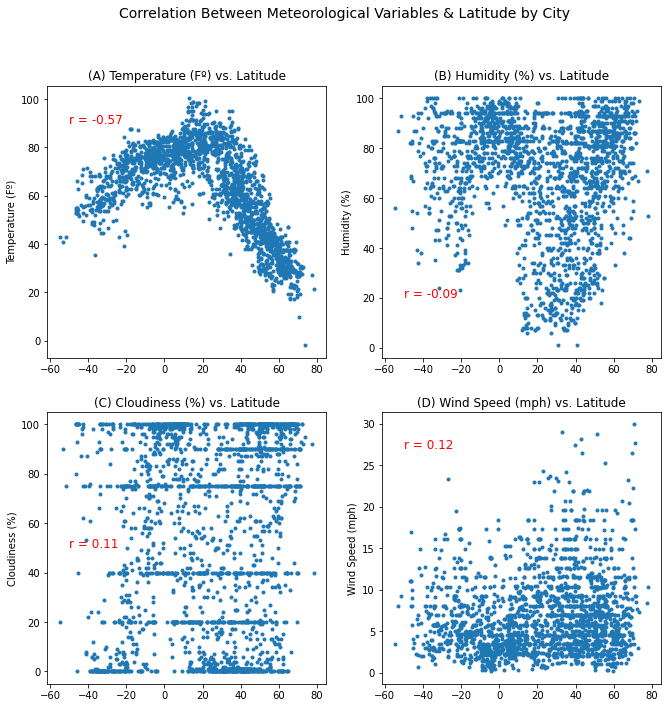

In [37]:
#Scatter-plots for multiple variables

fig1, axs = plt.subplots(2,2, figsize=(11,11))
fig1.suptitle("Correlation Between Meteorological Variables & Latitude by City", size= 14)

axs[0,0].scatter(df.loc[:,"Lat"], df.loc[:,"Temperature (F)"], marker= ".")
axs[0,0].set_title("(A) Temperature (Fº) vs. Latitude")
axs[0,0].set_ylabel("Temperature (Fº)")
axs[0,0].text(-50, 90, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Temperature (F)"])[0,1],2)}', color= "red", fontsize= 12)

axs[0,1].scatter(df.loc[:,"Lat"], df.loc[:,"Humidity (%)"], marker= ".")
axs[0,1].set_title("(B) Humidity (%) vs. Latitude")
axs[0,1].set_ylabel("Humidity (%)")
axs[0,1].text(-50, 20, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Humidity (%)"])[0,1],2)}', color= "red", fontsize= 12)

axs[1,0].scatter(df.loc[:,"Lat"], df.loc[:,"Cloudiness (%)"], marker= ".")
axs[1,0].set_title("(C) Cloudiness (%) vs. Latitude")
axs[1,0].set_ylabel("Cloudiness (%)")
axs[1,0].text(-50, 50, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Cloudiness (%)"])[0,1],2)}', color= "red", fontsize= 12)

axs[1,1].scatter(df.loc[:,"Lat"], df.loc[:,"Wind Speed (mph)"], marker= ".")
axs[1,1].set_title("(D) Wind Speed (mph) vs. Latitude")
axs[1,1].set_ylabel("Wind Speed (mph)")
axs[1,1].text(-50, 27, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Wind Speed (mph)"])[0,1],2)}', color= "red", fontsize= 12)

plt.show()

###### _2.1.A - Temperature vs. Latitude_
There seems to be a correlation between Latitude and Temperature. The Pearson's correlation coefficient indicated a -0.57 relationship between both variables. However, from a simple look at the scatter plot we can see that the correlation is not Linear. Higher temperature (Fº) values are concentrated arround the 0º Latitude. As we move towards negative and positive Latitude values, the temperature drops. Lower temperature city recors are concentrated in positive Latitude values, while temperature doesn't fall below 40ºF (aprox.) in negative Latitude values. This is clearly because our sample of cities has more records North of the Equator (Central and North America, Europe, North Africa, Middle East Asia), than south of the Equator (South America, South Africa and Australia). Most of the urban agglomerations are in the global north. 

While the relationship doesn't seem to be Linear, there is clearly a statistically significant relationship that potentially could be modelled though a Polynomial model. _(e.g.:  Temp = b0 + b1* Lat + b2 * Lat^2 + b3 * Lat^3)_ Another alternative could be breaking down the series into two models (north and south hemisfere) or making a square transformation to Latitude variable (to turn all values positive).

###### _2.1.B -  - Humidity vs. Latitidue_
There is a very low negative correlation between both variables (Pearson's r = -0.09). Ther seems to be a very large concentration of observations in high humidity around 0º Latitude. This is consistent with common knowledge (countries like Ecuador, Colombia, Congo or Malaysia are close to the Equator and have tropical climate)

The relationship is not linear, and either way we can't run a simple regression model with % data as a dependent variable (since fitted values can't be lower than 0 and higher than 100). A potential approach could be using a Generalized linear modeles like a Probit or Logit transformation.

###### _2.1.C - Cloudiness vs. Latitude_
There is also a very low correlation between both variables (Pearsons's r = 0.11). Again, the relationship is not linear, and either way we can't run a simple regression model with % data as a dependent variable (since fitted values can't be lower than 0 and higher than 100). A potential approach could be using a Generalized linear modeles like a Probit or Logit transformation.

######  _2.1.D - Wind Speed vs. Latitude_
Ther doesn't seem to be any clearly visible linear correlation (Pearson's r= 0.12). However we can see that there is a big concentration of low wind speeds around the 0º latitude. Potentially the figure could be modeled through a Polynomial function or would show better results if we remove negative symbol from observations in South hemisphere.


In [39]:
## Saving graphs as .png
fig1.savefig("results/meteorological_variables_vs_Latitude.png")

### 2.2 - Regression Analysis 

###### 2.2.A - Temperature vs. Latitude - Lineal Regression

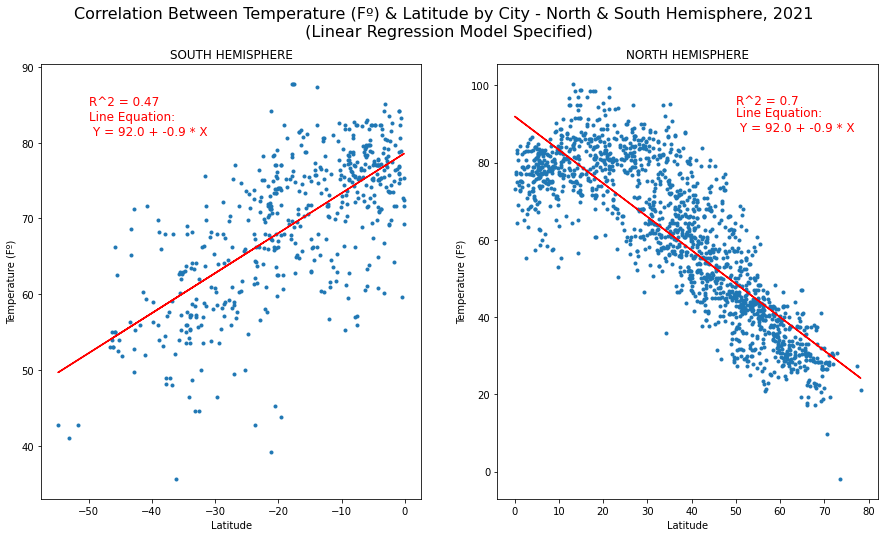

In [45]:
#Breaking df into North and South Hemisphere
df_north = df.loc[df["Lat"] >= 0,:]
df_south = df.loc[df["Lat"] < 0,:]

#Temp vs. Lat linear regressions
lm1_north = linregress(x= df_north["Lat"], 
                       y= df_north["Temperature (F)"])
lm1_north_fitted = lm1_north[1] + lm1_north[0] * df_north["Lat"]
lm1_south = linregress(x= df_south["Lat"], 
                       y= df_south["Temperature (F)"])
lm1_south_fitted = lm1_south[1] + lm1_south[0] * df_south["Lat"]

#Plotting temperature vs. latitude correlations
fig2, axs = plt.subplots(1,2, figsize=(15,8))
fig2.suptitle("Correlation Between Temperature (Fº) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Temperature (F)"], marker= ".")
axs[1].plot(df_north["Lat"], lm1_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Temperature (Fº)")
axs[1].set_xlabel("Latitude")
axs[1].text(50, 95, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Temperature (F)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(50, 88, f'Line Equation: \n Y = {round(lm1_north[1],1)} + {round(lm1_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Temperature (F)"], marker= ".")
axs[0].plot(df_south["Lat"], lm1_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Temperature (Fº)")
axs[0].set_xlabel("Latitude")
axs[0].text(-50, 85, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Temperature (F)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-50, 81, f'Line Equation: \n Y = {round(lm1_north[1],1)} + {round(lm1_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

There is a strong negative correlation between Latitude and and Temperature at the North Hemisphere cities. The R^2 value for the fitted regressiongoes up to 0.7. Most importantly, Latitude is statistically significant with a P-value of near 0. With a multiple linear regrssion model which included other variables like Altitude or Cloudiness, we could potentially explain a big portion of the variability of Temperature in relationship to Latitude. 

On contrast, the South Hemisphere city dataset presents weaker linear regression fit, with an R^2 of 0.47 (still good). The sample is smaller and the observations are largely scattered. The Latitude variable is not statistically significant (p-value = 3.11), so we can't rule out the Null hypothesis of no correlation between Lat and Temp. Probably the simple linear model is not the best to predict temperatures in the Southern Hemisphere.

Now we find the challenge of unifying both North and South datasets into one and building an unified regression model which can predict Temperature behaviour across the globe. As mentioned above, a Polynomial model could be tried. Other variables could be included in as a multiple regression model too.

######  2.2.B -  Humidity vs. Latitude - Lineal Regression

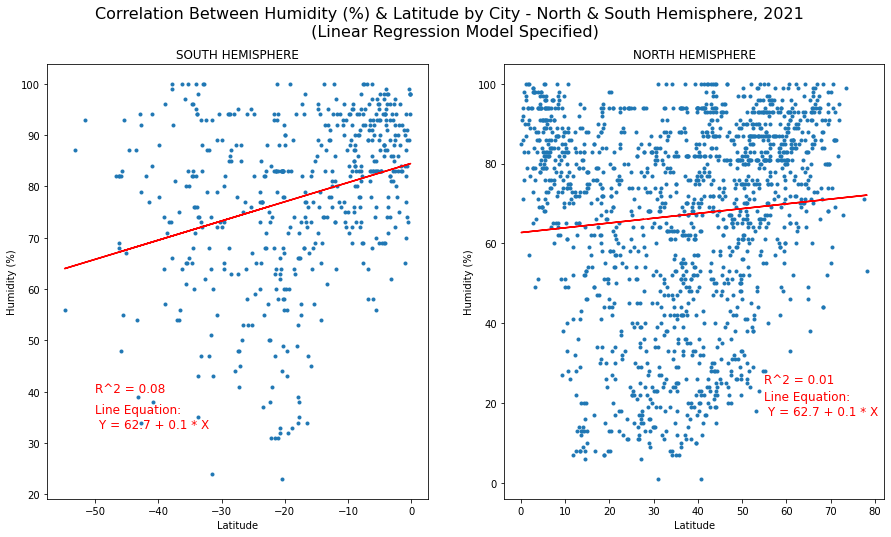

In [53]:
#Humid vs. Lat linear regressions
lm2_north = linregress(x= df_north["Lat"], 
                       y= df_north["Humidity (%)"])
lm2_north_fitted = lm2_north[1] + lm2_north[0] * df_north["Lat"]
lm2_south = linregress(x= df_south["Lat"], 
                       y= df_south["Humidity (%)"])
lm2_south_fitted = lm2_south[1] + lm2_south[0] * df_south["Lat"]

#Plotting humidity vs. latitude correlations
fig3, axs = plt.subplots(1,2, figsize=(15,8))
fig3.suptitle("Correlation Between Humidity (%) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Humidity (%)"], marker= ".")
axs[1].plot(df_north["Lat"], lm2_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Humidity (%)")
axs[1].set_xlabel("Latitude")
axs[1].text(55, 25, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Humidity (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(55, 17, f'Line Equation: \n Y = {round(lm2_north[1],1)} + {round(lm2_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Humidity (%)"], marker= ".")
axs[0].plot(df_south["Lat"], lm2_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Humidity (%)")
axs[0].set_xlabel("Latitude")
axs[0].text(-50, 40, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Humidity (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-50, 33, f'Line Equation: \n Y = {round(lm2_north[1],1)} + {round(lm2_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

Absolute no linear correlation between Latitude and Humidity (%) either for North or South hemisphere. First of all, this model shouldn't be linear, since the dependent variable (Humidity) is in percentage units and can only have values from 0 to 100. Therefore a transformation is needed. For example, possibly, a logit model which assumes values from 0 to 1. Secondly, there seems to be a large amount of observations concentrated around 0 Lat degrees for both North and South hemispheres. It would be interesting to see a model that puts together both series and tries to caputre this phenomenon.

######  2.2.C -  Cloudiness vs. Latitude - Lineal Regression

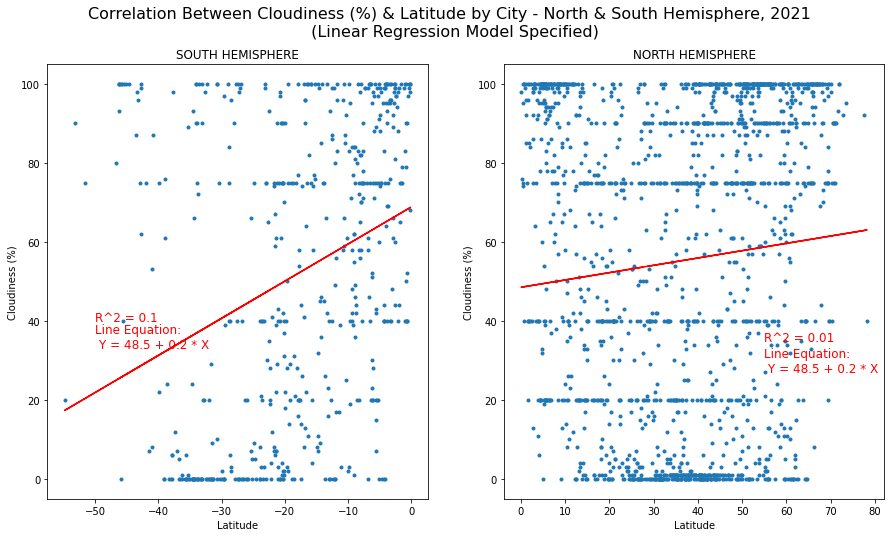

In [58]:
#Cloudiness vs. Lat linear regressions
lm3_north = linregress(x= df_north["Lat"], 
                       y= df_north["Cloudiness (%)"])
lm3_north_fitted = lm3_north[1] + lm3_north[0] * df_north["Lat"]
lm3_south = linregress(x= df_south["Lat"], 
                       y= df_south["Cloudiness (%)"])
lm3_south_fitted = lm3_south[1] + lm3_south[0] * df_south["Lat"]

#Plotting cloudiness vs. latitude correlations
fig4, axs = plt.subplots(1,2, figsize=(15,8))
fig4.suptitle("Correlation Between Cloudiness (%) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Cloudiness (%)"], marker= ".")
axs[1].plot(df_north["Lat"], lm3_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Cloudiness (%)")
axs[1].set_xlabel("Latitude")
axs[1].text(55, 35, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Cloudiness (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(55, 27, f'Line Equation: \n Y = {round(lm3_north[1],1)} + {round(lm3_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Cloudiness (%)"], marker= ".")
axs[0].plot(df_south["Lat"], lm3_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Cloudiness (%)")
axs[0].set_xlabel("Latitude")
axs[0].text(-50, 40, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Cloudiness (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-50, 33, f'Line Equation: \n Y = {round(lm3_north[1],1)} + {round(lm3_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

There is absolutely no linear relationship whatsoever again in those two graphs. The graphical representation of the lines are the result of a highly unstable model. R^2 for both North and South is near 0, implying poor model fit. Dependent variables in percentage units can't be properly modeled with a simple linear regression, we need some other transformation to capture if there is a relationship between Cloudiness and Latitude.

######  2.2.C -  Wind Speed  vs. Latitude - Lineal Regression

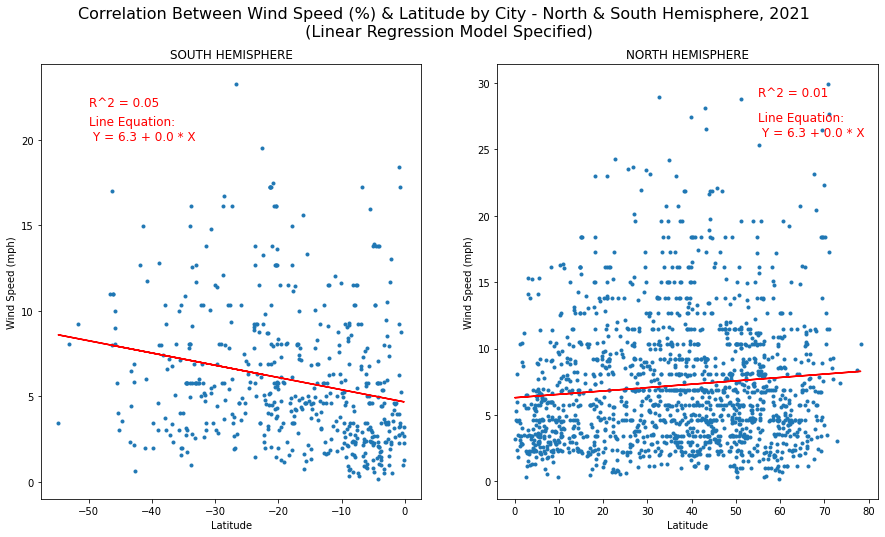

In [67]:
#Wind Speed vs. Lat linear regressions
lm4_north = linregress(x= df_north["Lat"], 
                       y= df_north["Wind Speed (mph)"])
lm4_north_fitted = lm4_north[1] + lm4_north[0] * df_north["Lat"]
lm4_south = linregress(x= df_south["Lat"], 
                       y= df_south["Wind Speed (mph)"])
lm4_south_fitted = lm4_south[1] + lm4_south[0] * df_south["Lat"]

#Plotting Wind Speed vs. latitude correlations
fig5, axs = plt.subplots(1,2, figsize=(15,8))
fig5.suptitle("Correlation Between Wind Speed (%) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Wind Speed (mph)"], marker= ".")
axs[1].plot(df_north["Lat"], lm4_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Wind Speed (mph)")
axs[1].set_xlabel("Latitude")
axs[1].text(55, 29, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Wind Speed (mph)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(55, 26, f'Line Equation: \n Y = {round(lm4_north[1],1)} + {round(lm4_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Wind Speed (mph)"], marker= ".")
axs[0].plot(df_south["Lat"], lm4_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Wind Speed (mph)")
axs[0].set_xlabel("Latitude")
axs[0].text(-50, 22, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Wind Speed (mph)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-50, 20, f'Line Equation: \n Y = {round(lm4_north[1],1)} + {round(lm4_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

The figures would suggest that the closer we get to the Equator, the slower observed wind speed gets, both for North and South hemisphere models. However, both models are statistically very poor, the goodness of fit (R^2) are of 0.05 and 0.01. For both the p-value is not statistically sifnificant. The impact of Latitude in Wind Speed is very little in the case of North hemisphere. This may imply that there is are missing variables not specified in the model which could explain with a better fit the nature of the relationship. 

It would be interesting to test a polynomial or other type of model which could potentially capture the behaviour of this relationship including both North and South datasets. 

In [70]:
#Saving figures
fig2.savefig("results/temperature_vs_Latitude_regression.png")
fig3.savefig("results/humidity_variables_vs_Latitude_regression.png")
fig4.savefig("results/cloudiness_variables_vs_Latitude_regression.png")
fig5.savefig("results/windspeed_variables_vs_Latitude_regression.png")